## Изучение исходных данных.

In [1]:
import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt

from scipy import stats as st

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


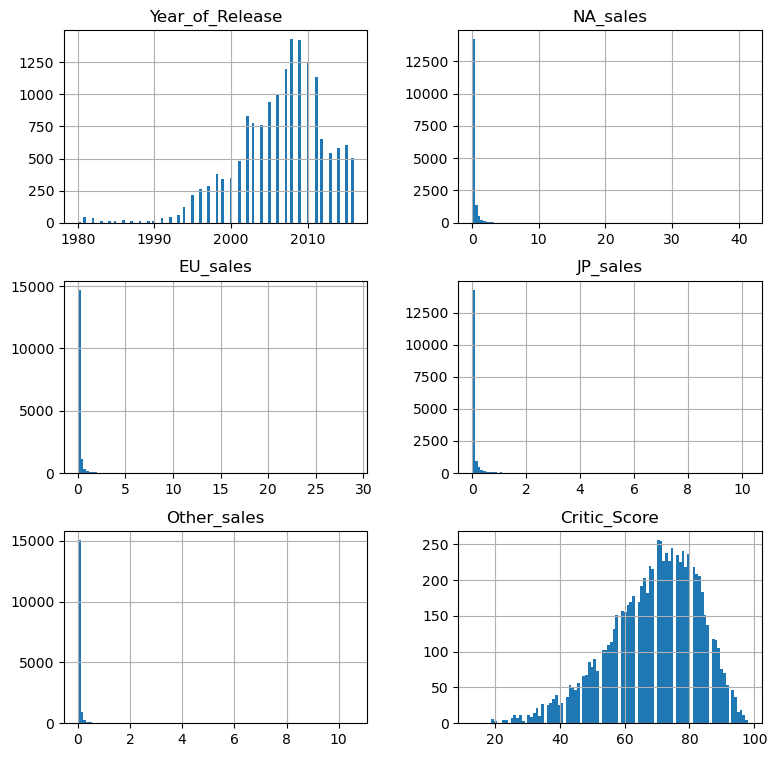

In [6]:
data.hist(figsize=(9, 9), bins=100)
plt.show()

In [7]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Датасет состоит из 11 столбцов и 16715 строк.  

В 6 столбцах наблюдаются пропущенные значения.  

Необходимо поменять тип данных в столбцах: `Year_of_Release`, `Critic_Score`, `User_Score`.   

Необходимо переименовать все столбцы, а именно привести к нижнему регистру.  

По первоначальным гистограммам виден рост выпуска игр с 1994 года.  
Большинство игр было продано менее 200 тысяч копий в разных странах.  
Распределение гистограммы оценки критиков похоже на нормальное, скошенное вправо. Пик значений приходится на диапазон оценок от 70 до 80.

## Предобработка данных.  
### Переименование столбцов.

In [8]:
data.columns = data.columns.str.lower()

Названия столбцов приведены в нижний регистр.

### Обработка пропусков.
**1. Название игры.**  

Рассмотрим строки с пропусками в названии игры.

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Помимо названия игры есть пропуски в жанре, оценках критиков, пользователей и возрастном рейтинге. Исследование связано напрямую с играми, но в строках нет даже жанра. Придётся их удалить, так как они неинформативные.  
Также стоит заметить, что всего в датасете две строки с пропущенными жанрами. Рассматриваемые строки как раз ими являются, поэтому в этом пункте удаляются строки с пропусками в названии игры и жанре.

In [10]:
data = data.dropna(subset=['name'])

**2. Год выпуска**

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(-1)

Не будем удалять строки с пропусками года релиза. Пустые значения в ячейках заполним числом -1. Будем иметь ввиду, что это число означает игру с неизвестным годом выпуска.

**3. Оценка критиков.**  

В столбце с оценкой критиков около половины данных с пропущенными значениями. По аналогии с годом релиза заполним пропуски числом -1.

In [12]:
data['critic_score'] = data['critic_score'].fillna(-1)

**4. Оценка пользователей.**  

Рассмотрим уникальные значения столбца и их количество.

In [13]:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7       220
7.6     220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.6      72
5.4      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.5      34
4.4      33
4.1      33
9.3      31
4.2      28
3.8      28
4        27
3.5      26
2.8      24
4.7      24
3.4      23
3.1      23
3        21
3.6      20
3.7      19
3.3      15
3.9      13
3.2      13
2.5      12
2.4      11
2        11
9.4      11
2.1       9
1.7       9
2.9       9
2.7       8
9.5       6
1.8       6
2.2       6
1.4       5
2.6       4
1.6       3
1.2       3
0.5       2
1         2
0.9 

Наблюдаем абревиатуру tbd, то есть to be determined, что означает, рейтинг пользователей в игре не определён на данный момент. Так как значения столбца представлены числами, поменяем абревиатуру tbd и пропуски на число -1.

In [14]:
data['user_score'] = data['user_score'].where(data['user_score'] != 'tbd', '-1')
data['user_score'] = data['user_score'].fillna('-1')

**5. Возрастная категория.**  

Пропуски в столбце с возврастной категорией заменим на '-'.

In [15]:
data['rating'] = data['rating'].fillna('-')

Проверим датасет на наличие пропусков.

In [16]:
print('Пропусков в датасете =', data.isna().sum().sum())

Пропусков в датасете = 0


Вывод: пропуски в названии игры, годе релиза, жанре могли появиться из-за некорректно выгруженных данных, либо этой информации изначально не было. Пропуски в оценках критиков и пользователей можно объяснить тем, что на данный момент рейтинг не собран. Пропущенная возрастная категория может говорить о том, что продукт не был отправлен в ESRB на оценку.

### Изменение типов данных.

In [17]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['critic_score'] = data['critic_score'].astype('int')
data['user_score'] = data['user_score'].astype('float')

Год релиза это целое число, поэтому меняем тип данных на integer.  
Аналогично с оценкой критиков.  
Оценка пользователей представлена в виде числа с десятичной дробью, поэтому строковый тип меняем на вещественный float.

### Обработка дубликатов.  

Приведём значения столбцов со строковыми типами данных к нижнему регистру.

In [18]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()

Рассмотрим все возрастные категории, имеющиеся в датасете.

In [19]:
data['rating'].unique()

array(['e', '-', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'], dtype=object)

Категория 'e' и 'k-a' это одно и то же (everyone - для всех). Поменяем все ячейки со значением 'k-a' на 'e'.

In [20]:
data['rating'] = data['rating'].str.replace('k-a', 'e')

Проверим датасет на наличие явных дубликатов. Методу `duplicated()` передадим столбцы `name`, `platform`, `year_of_release`, `genre`, `rating`.

In [21]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre', 'rating'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,e
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,e


Значения продаж по регионам во второй строке менее информативны, поэтому удаляем строку с индексом 16230.

In [22]:
data = data.drop(16230, axis=0)

Вывод: возрастная категория "для всех" приведена к ондому виду.  
Выявлена и удалена одна дублирующаяся строка.

### Сумарные продажи во всех регионах.  

Сложим значения по продажам в разных регионах и получим столбец суммарных продаж во всех регионах `total_sales`.

In [23]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

## Исследовательский анализ данных.

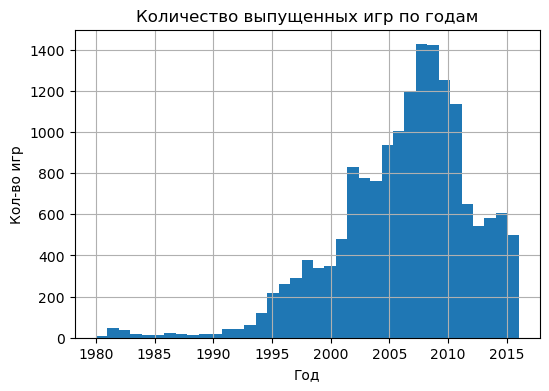

In [24]:
years_hist = data['year_of_release'].hist(range=(1980, 2016), bins=37, figsize=(6, 4))
years_hist.set_xlabel('Год')
years_hist.set_ylabel('Кол-во игр')
years_hist.set_title('Количество выпущенных игр по годам')
plt.show()

Количество выпущенных игр в год начало стремительно расти с 1994 года. Далее с 2003 по 2004 наблюдается небольшое снижение, а затем рост до пикового значения в 2008 году, более 1400 выпущенных игр. По следующим годам видно снижение релизов игр.  

Посмотрим, как распределяются суммарные продажи игр по платформам.

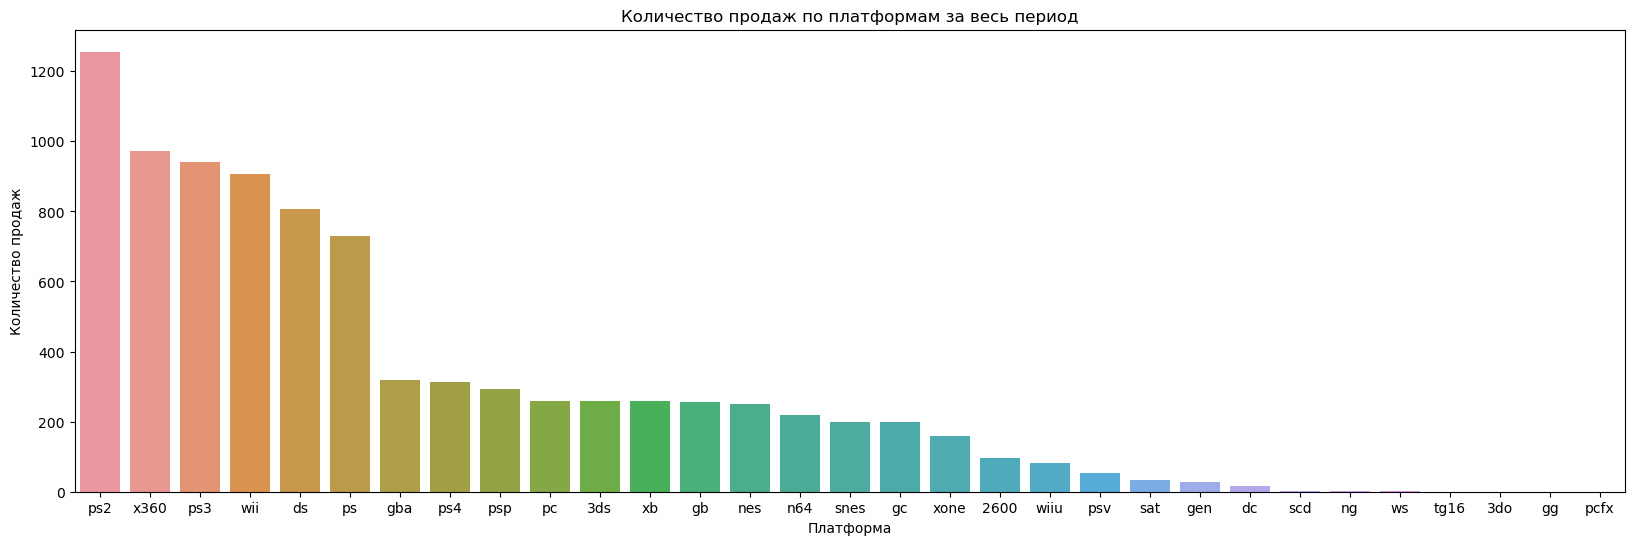

In [25]:
plt.figure(figsize=(20, 6))
platform_total_sales = sns.barplot(data=data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                                        .sort_values(by='total_sales', ascending=False)
                                        .reset_index(),
                                   x='platform', 
                                   y='total_sales'
                                  )
platform_total_sales.set_title('Количество продаж по платформам за весь период')
platform_total_sales.set_xlabel('Платформа')
platform_total_sales.set_ylabel('Количество продаж')
plt.show()

На первые 6 платформ из сводной таблицы приходится почти 2/3 всех продаж. Построим распределение продаж среди этих платформ по годам.

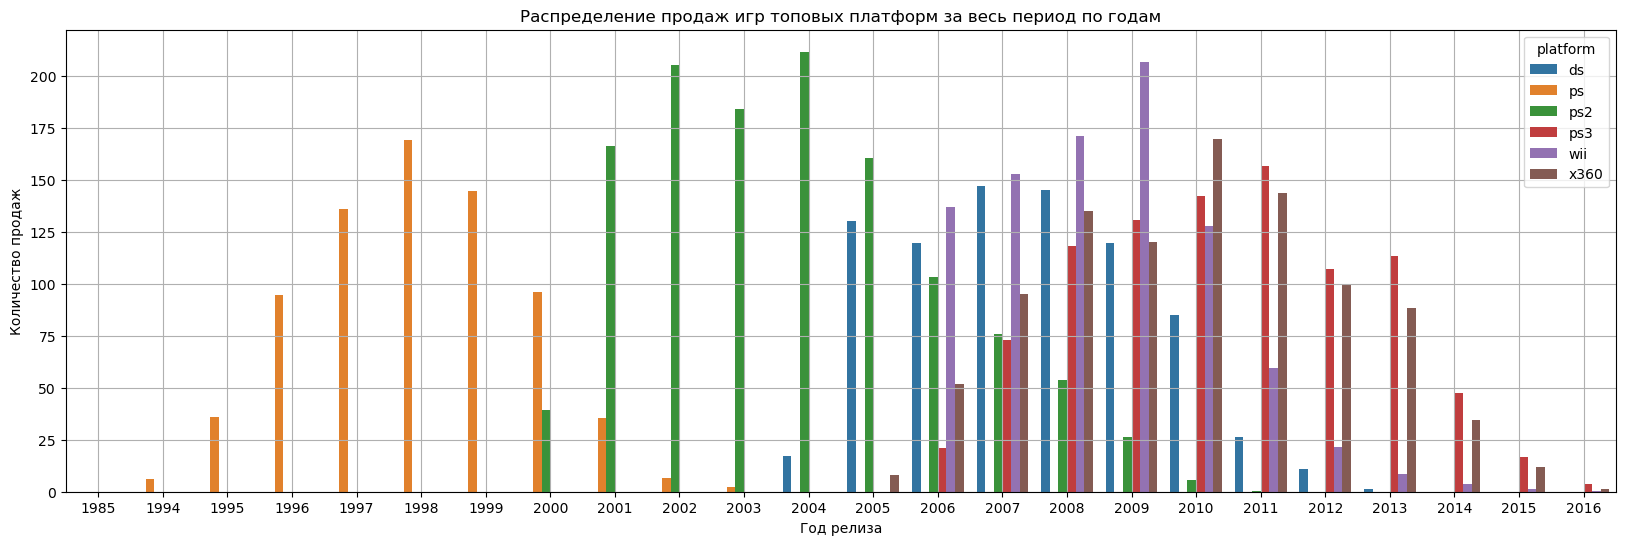

In [26]:
# Создаём список, содержащий платформы с наибольшими продажами.
top_platforms = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .index[:6]
)

# Фильтруем датасет по интересующим платформам.
top_sales_platforms = (
    data.query('platform in @top_platforms and year_of_release != -1')
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .reset_index()
)

# Строим гистограмму количества продаж по платформам и годам.
plt.figure(figsize=(20, 6))
distr_of_platform = sns.barplot(data=top_sales_platforms, x='year_of_release', y='total_sales', hue='platform')
distr_of_platform.grid()
distr_of_platform.set_title('Распределение продаж игр топовых платформ за весь период по годам')
distr_of_platform.set_xlabel('Год релиза')
distr_of_platform.set_ylabel('Количество продаж')
plt.show()

Игры на платформе ds продавались с 2004 по 2013 года. Распределение продаж напоминает расрпеделение Пуассона.  
Игры на платформе ps начали активно продавались с 1994 по 2003 года. Распределение продаж напоминает нормальное.  
Игры на платформе ps2 продавались с 2000 по 2011 года. Наибольшее число продаж относительно других годов и других платформ за 2004 год.  
Игры на платформе ps3 продавались с 2006 по 2016 года. Наибольшее число продаж за 2011 год.  
Игры на платформе wii продавались в период с 2006 по 2016 года. Выделяются продажи в 2006 году, значение наибольшее среди других годов.  
Игры на платформе x360 продавались с 2005 по 2016 года. Пик продаж был в 2010 году, после чего наблюдается снижение.  

На примере данных платформ можно предположить, что продажи игр растут в течение нескольких лет, а затем снижаются.  
Новые платформы заменяют старые.  
Иногда наблюдается резкий скачок продаж, например в случае с платформой ps2 в 2004 году. В 2003 году наблюдается снижение продаж, но в 2004 продажи выросли, а затем снова снижались. Возможно, вышла игра, которая является эксклюзивом для данной платформы, поэтому геймеры стали активнее покупать игры этой платформы.  

Для прогноза на 2017 год возьмём данные за последние 5 лет.

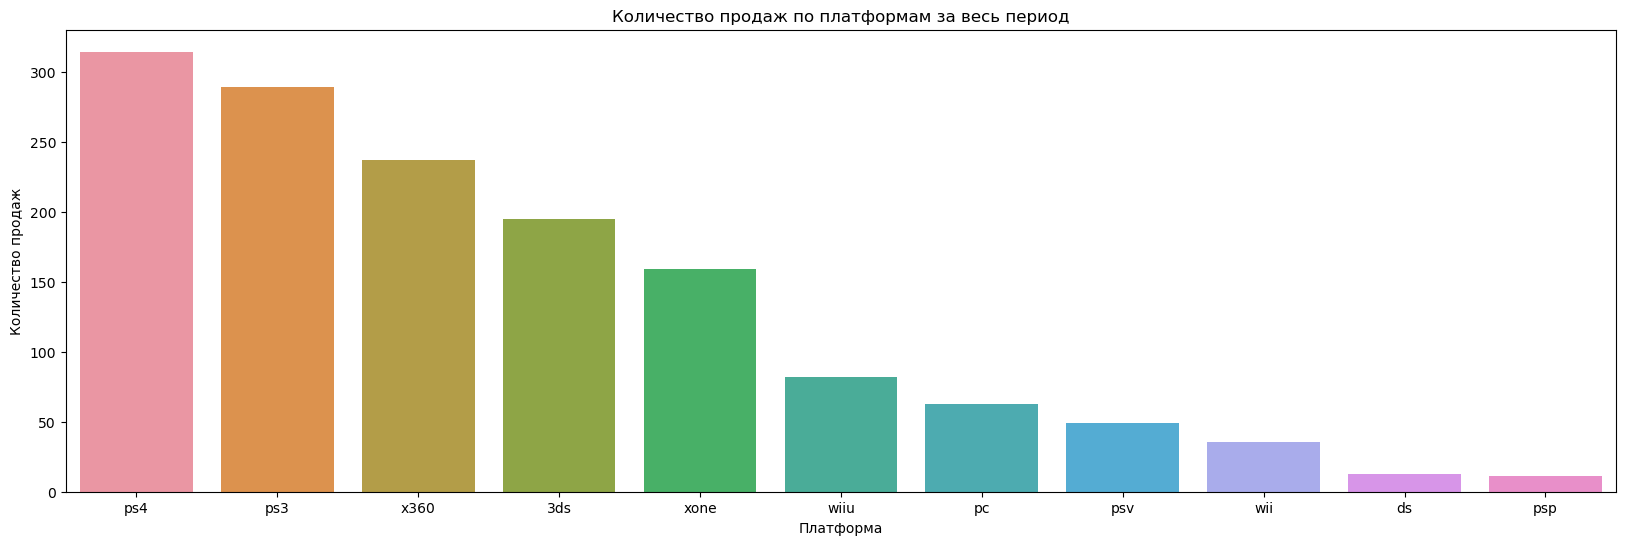

In [27]:
# Фильтруем датасет по актуальному периоду.
actual_data = data.query('year_of_release >= 2012')

# Строим гистограмму, при помощи которой определим топовые актуальные платформы.
plt.figure(figsize=(20, 6))
actual_platform_total_sales = sns.barplot(data=actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                                               .sort_values(by='total_sales', ascending=False)
                                               .reset_index(),
                                          x='platform', 
                                          y='total_sales'
                                         )
actual_platform_total_sales.set_title('Количество продаж по платформам за весь период')
actual_platform_total_sales.set_xlabel('Платформа')
actual_platform_total_sales.set_ylabel('Количество продаж')
plt.show()

Рассмотрим, как распределяются общие продажи по первым 5 платформам по годам.

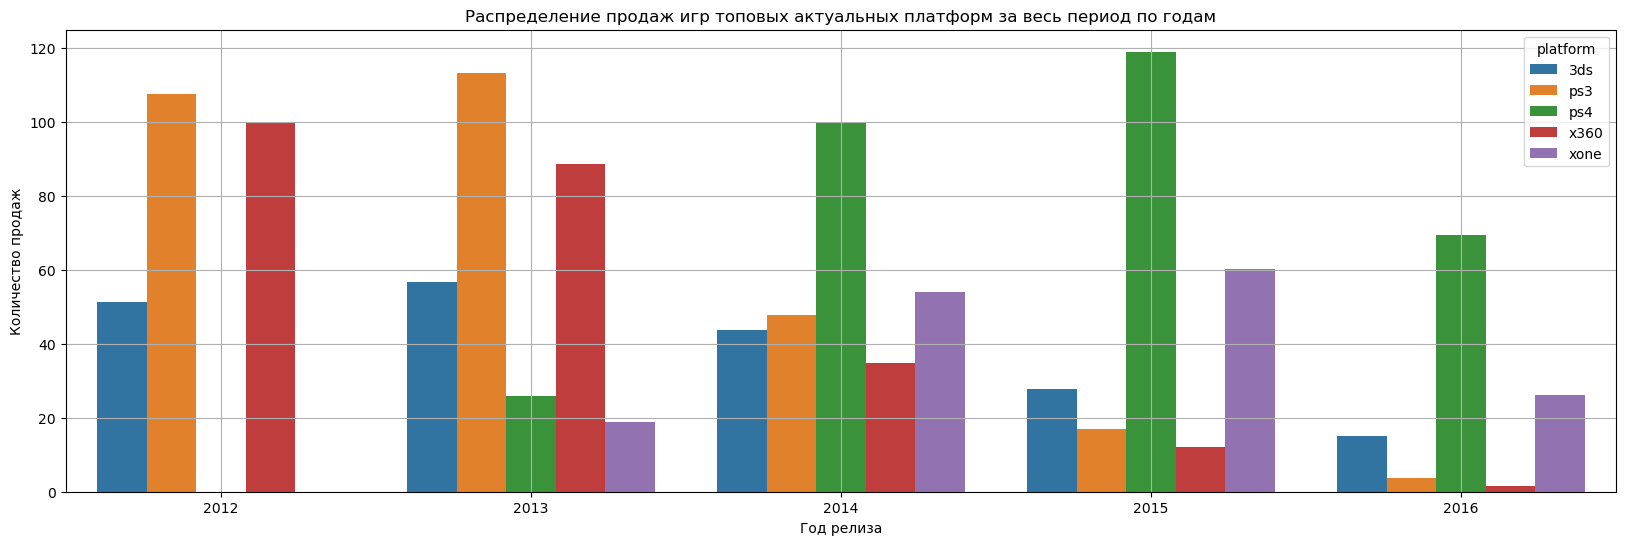

In [28]:
# Создаём список, содержащий платформы с наибольшими продажами за период с 2012 года.
top_modern_platforms = (
    actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .index[:5]
)

# Фильтруем датасет по интересующим платформам.
top_sales_modern_platforms = (
    actual_data.query('platform in @top_modern_platforms')
    .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
    .reset_index()
)

# Строим гистограмму количества продаж по платформам и годам.
plt.figure(figsize=(20, 6))
distr_of_actual_platform = sns.barplot(data=top_sales_modern_platforms, x='year_of_release', y='total_sales', hue='platform')
distr_of_platform.grid()
distr_of_actual_platform.set_title('Распределение продаж игр топовых актуальных платформ за весь период по годам')
distr_of_actual_platform.set_xlabel('Год релиза')
distr_of_actual_platform.set_ylabel('Количество продаж')
distr_of_actual_platform.grid()
plt.show()

С 2013 года в продаже появляются платформы ps4 и xone, которые заменяют платформы ps3 и x360.  
Наибольшие продажи с 2014 года наблюдаются по платформе ps4.  
Рассмотрев три оставшихся платформы заметим, что по платформам ps3 и 3ds рост продаж наблюдается до 2013 года, а далее количество проданных копий уменьшается. Меньше всего происходит уменьшение по платформе 3ds.  
По гистограмме лидирующие платформы: ps4, xone, 3ds.  

Построим боксплоты по платформам за актуальный период.

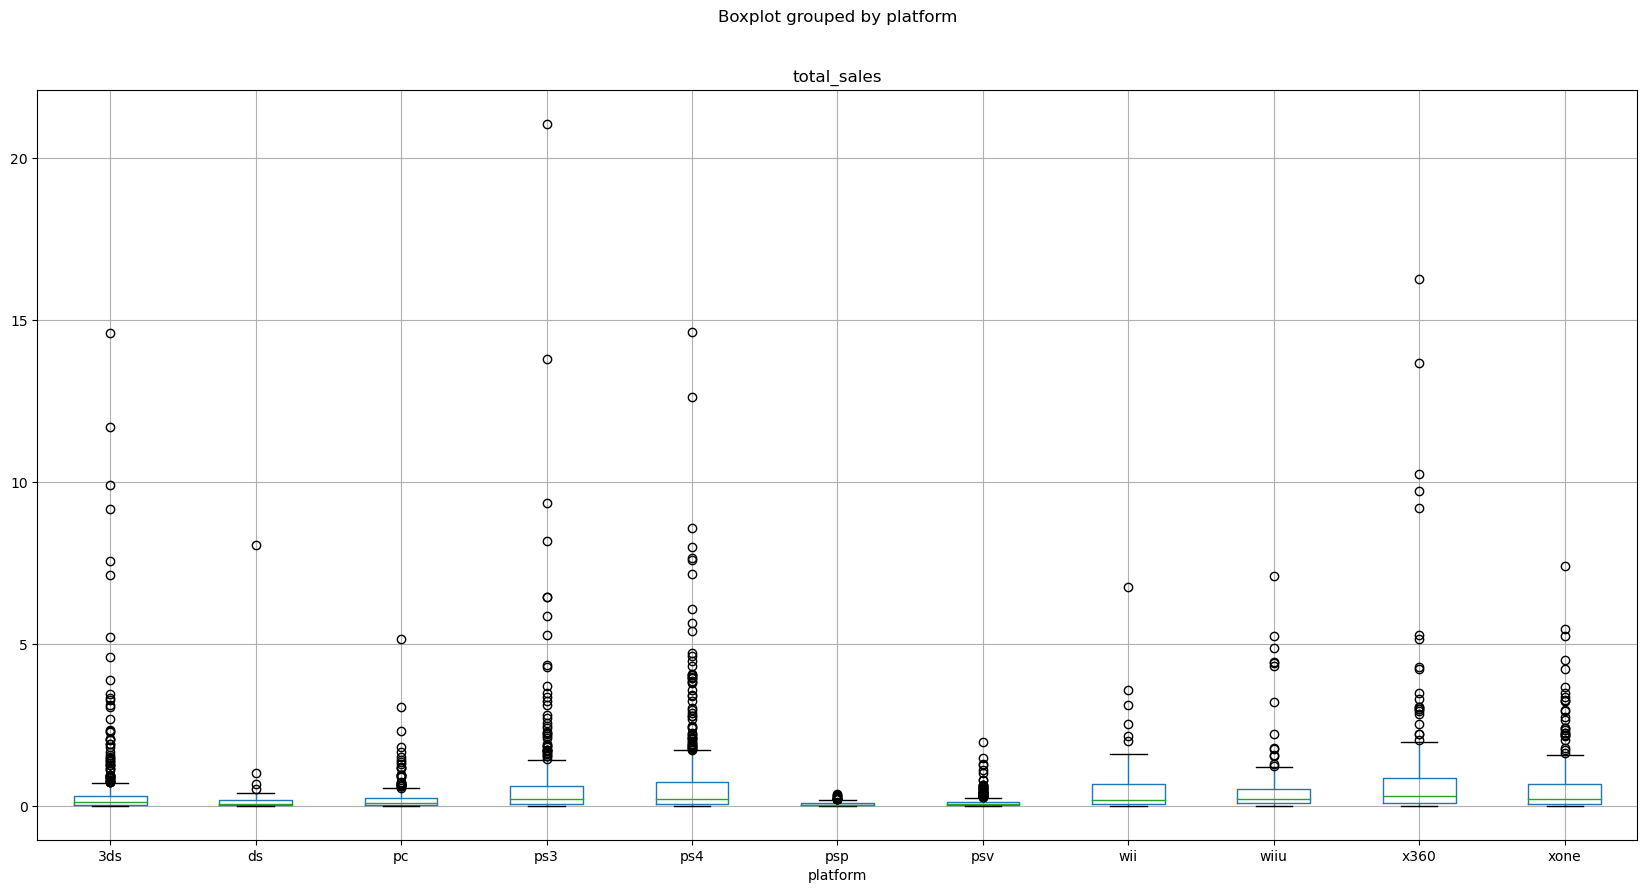

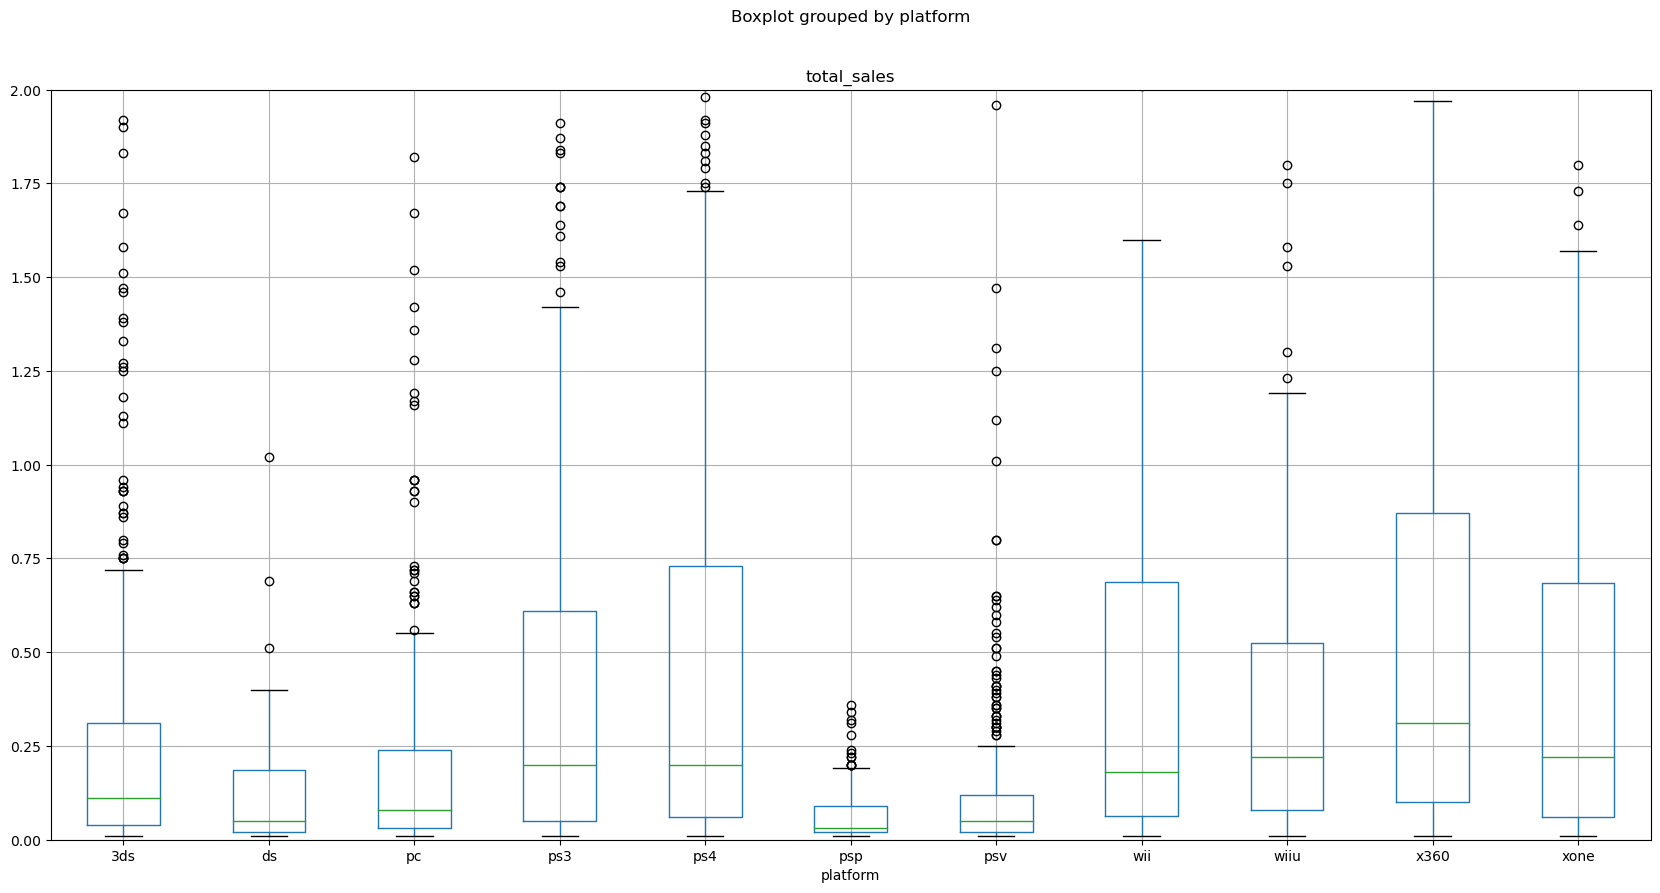

In [29]:
actual_data.boxplot(column='total_sales', by='platform', figsize=(20, 10))
actual_data.boxplot(column='total_sales', by='platform', figsize=(20, 10))
plt.ylim(0, 2)
plt.show()

На первом графике наблюдается множество выбросов по разным платформам. Нам интересны платформы с меньшим количеством выбросов и большей медианой.  
Исходя из диаграмм размаха на втором графике можно выделить несколько лидирующих платформ: x360, ps4, xone, ps3, wii.  
Учитывая результаты гистограммы и диаграмм размаха можно выделить следующие потенциально развивающиеся платформы: ps4, xone.  

Проверим наличие зависимости между оценками критиков и продажами, а также между оценками пользователей и продажами по разным платформам.

In [30]:
# Функция строит диаграммы рассеяния для оценок критиков и пользователей и суммарными продажами,
# а также находит коэффициент корреляции Пирсона.
def total_sales_scatter(plat):
    (
        actual_data.query('platform == @plat and critic_score >= 0')
        .plot(kind='scatter', x='critic_score', y='total_sales',figsize=(8, 4), grid=True)
        .set_title('Зависимость кол-ва проданных копий от оценки критиков по платформе ' + plat)
    )
    plt.show()
    print('Коэффициент корреляции Пирсона равен:', actual_data.query('platform == @plat and critic_score >= 0')['critic_score'].corr(actual_data.query('platform == @plat and critic_score >= 0')['total_sales']))
    (
        actual_data.query('platform == @plat and user_score >= 0')
        .plot(kind='scatter', x='user_score', y='total_sales',figsize=(8, 4), grid=True)
        .set_title('Зависимость кол-ва проданных копий от оценки пользователей по платформе ' + plat)
    )
    plt.show()
    print('Коэффициент корреляции Пирсона равен:', actual_data.query('platform == @plat and user_score >= 0')['user_score'].corr(actual_data.query('platform == @plat and user_score >= 0')['total_sales']))

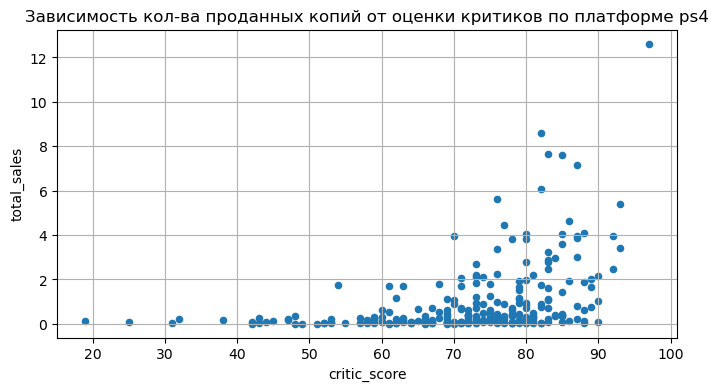

Коэффициент корреляции Пирсона равен: 0.40656790206178095


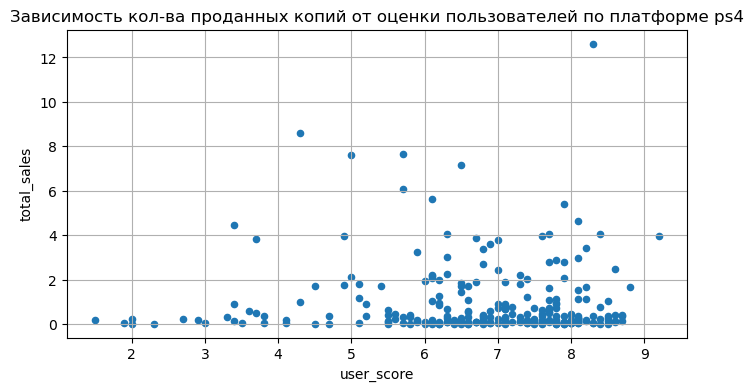

Коэффициент корреляции Пирсона равен: -0.031957110204556376


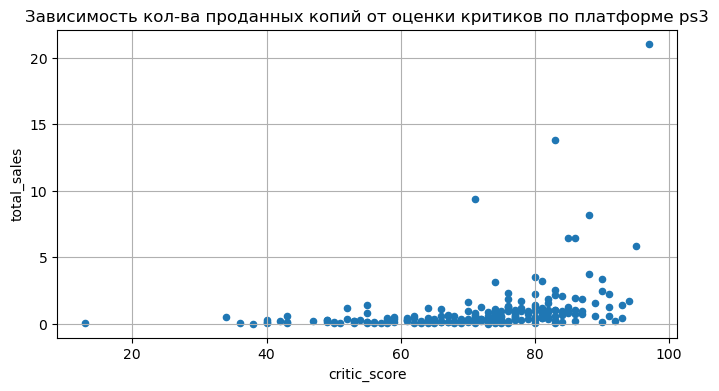

Коэффициент корреляции Пирсона равен: 0.3341517575509856


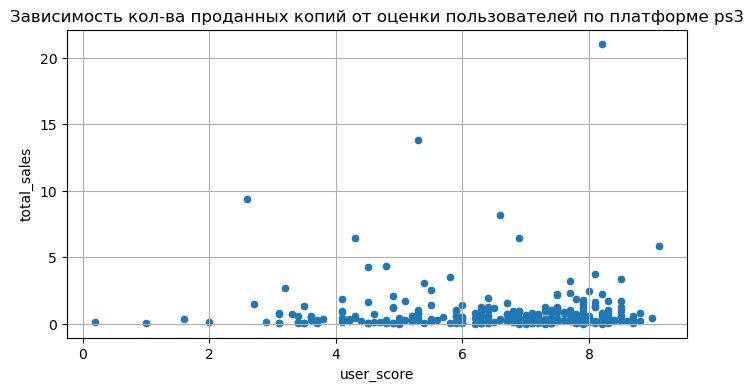

Коэффициент корреляции Пирсона равен: -0.006205767686051523


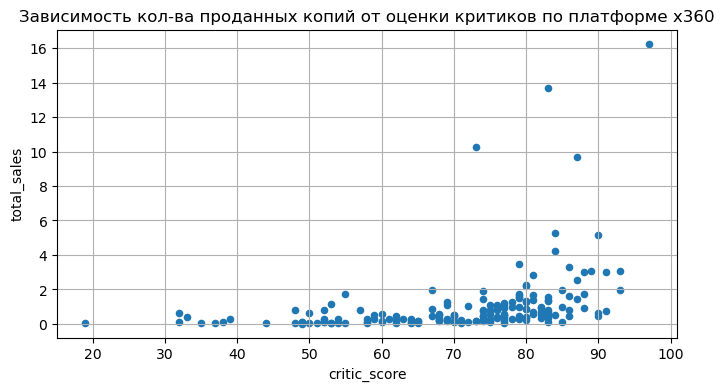

Коэффициент корреляции Пирсона равен: 0.3605734888507336


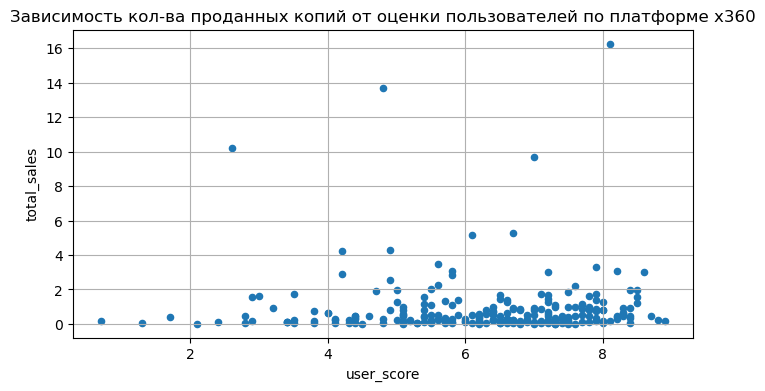

Коэффициент корреляции Пирсона равен: 0.006163978646213326


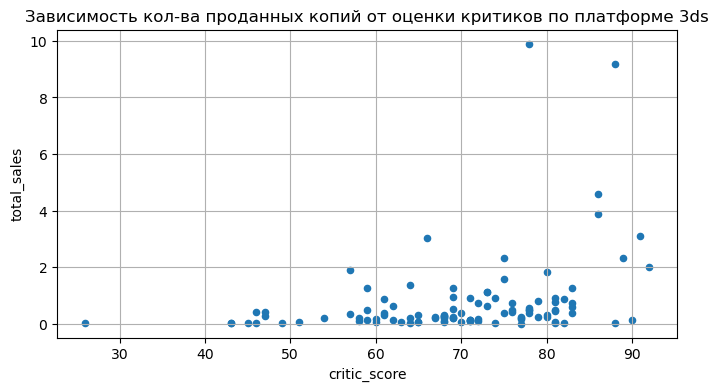

Коэффициент корреляции Пирсона равен: 0.3208028695360785


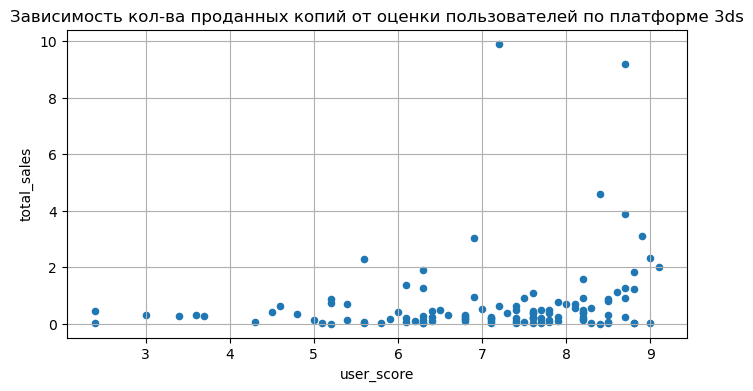

Коэффициент корреляции Пирсона равен: 0.19758263411038599


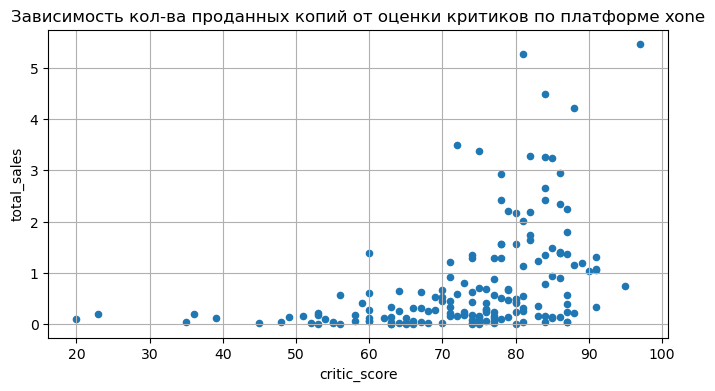

Коэффициент корреляции Пирсона равен: 0.4169983280084017


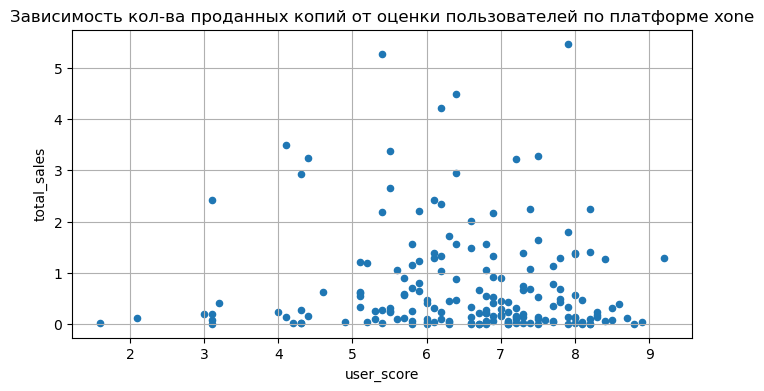

Коэффициент корреляции Пирсона равен: -0.06892505328279414


In [31]:
for i in top_modern_platforms:
    total_sales_scatter(i)

1. Оценки критиков.  
При оценке от 70 и выше наблюдается рост продаж по платформам ps4 и xone, что также подтверждается показателями корреляции.  
По платформе x360 повышаются продажи при оценке выше 73. зависимость слабее, чем в предыдущих платформах.  
По платформе ps3 рост начинается при оценке от 70, но лишь по нескольким играм. Большая часть игр по продажам поднимается незначительно, следовательно связь между оценками и продажами слабая.  
По платформе 3ds мало данных за актуальный период. Коэффициент корреляции меньше, относительно других платформ, связь близка к очень слабой.  
2. Оценки пользователей.  
По платформе ps4 некоторые игры с оценками от 3 до 6 имеют высокие продажи. Также стоит отметить рост продаж по множеству игр с оценками от 4 до 8.5. Коэффициент корреляции отрицательный, связь очень слабая, так как есть единичные игры с низкой оценкой, но высоким количеством продаж, а также большинство игр не меняется по количеству продаж при изменении оценки.  
По платформам ps3 и x360 также наблюдается очень слабая связь между оценкой и количеством продаж.  
По платформе 3ds коэффициент корреляции выше предыдущих платформ. Учитывая малое количество данных за актуальный период, сложно точно полагать, что есть положительный рост от увеличения оценки. Если даже связь есть, то она очень слабая.  
По платформе xone данные разбросаны по графику. Большая часть продаж приходится по играм с оценками от 5 до 8.  

**Вывод:** между оценками критиков и количеством продаж есть положительная слабая связь, в случае с оценками пользователей связь очень слабая.

In [32]:
genre_distr = actual_data.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
genre_distr.columns = ['count', 'total_sales']
genre_distr.sort_values(by='total_sales', ascending=False)

,count,total_sales
genre,,
action,1031,441.12
shooter,235,304.73
role-playing,370,192.80
sports,267,181.06
misc,192,85.04
platform,85,61.00
racing,115,53.50
fighting,109,44.49
simulation,80,35.12


На первом месте по количеству игр и суммарным продажам жанр action, далее role-play. Игры с жанром adventure знаимают третье место по количеству выпусков, но по продажам 10 место. Жанр shooter по количеству релизов на 5 месте, но по продажам на втором.  

Построим диграммы размаха и сравним медианные значения продаж по жанрам.

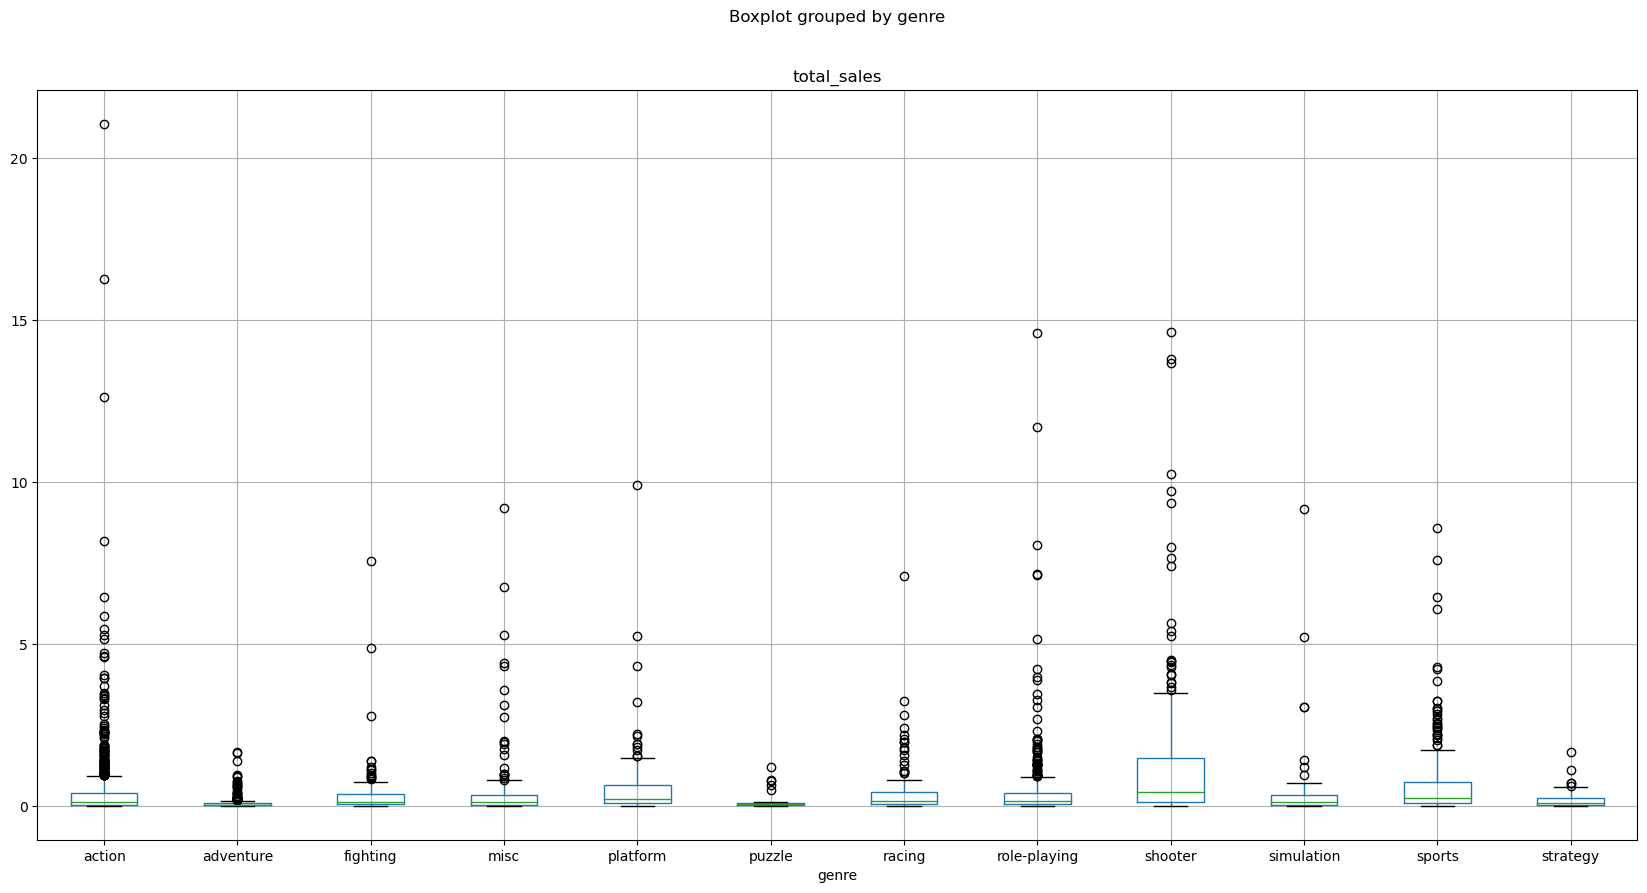

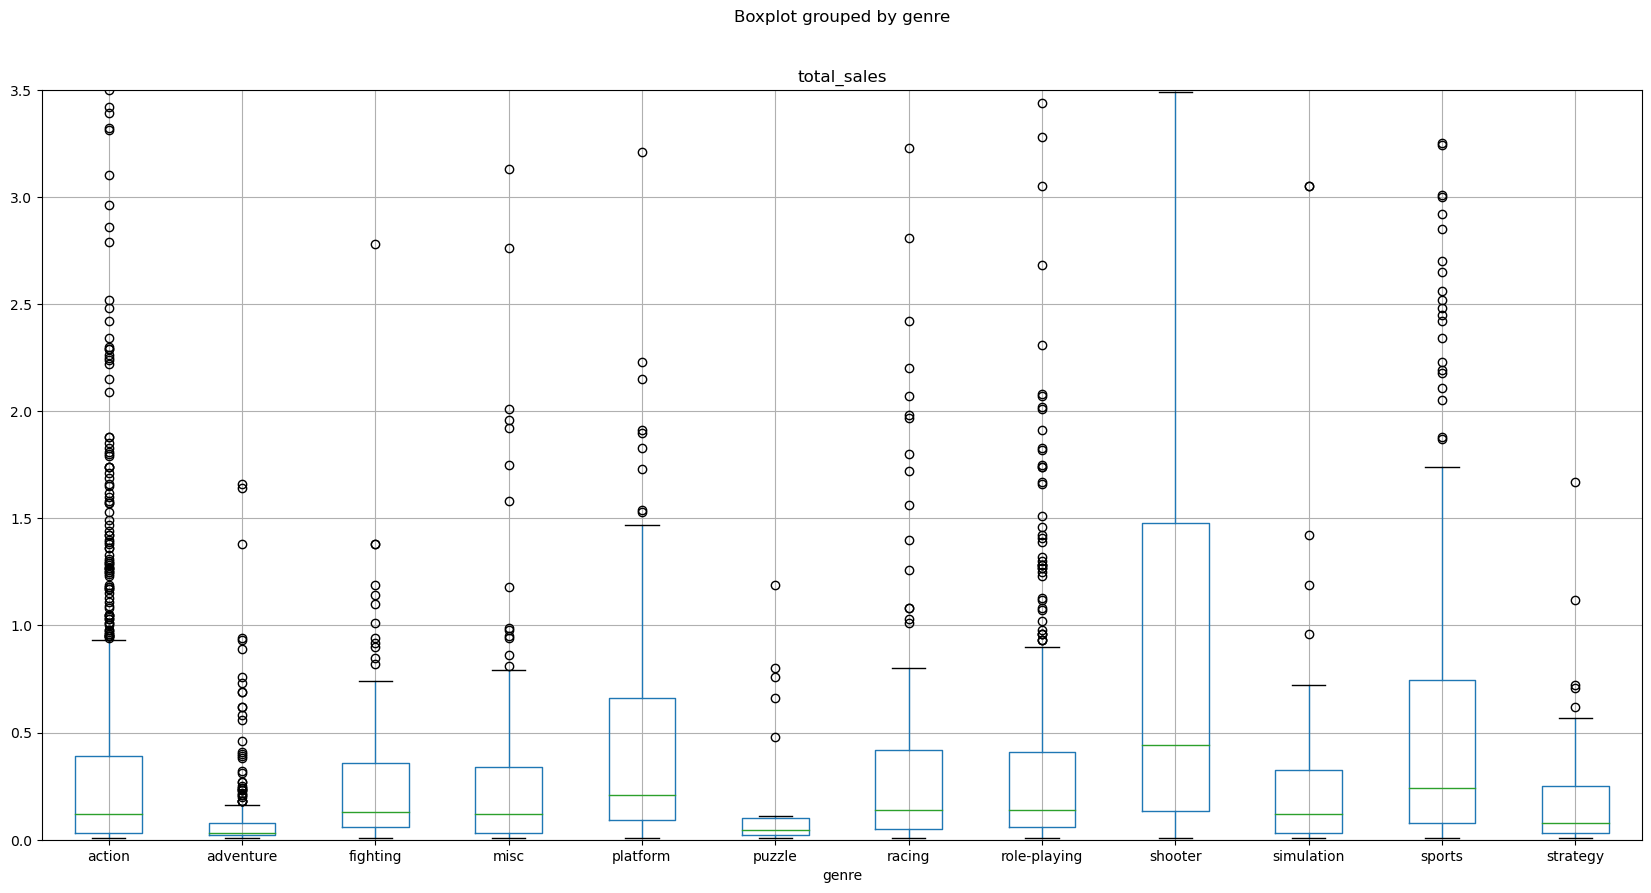

In [33]:
actual_data.boxplot(column='total_sales', by='genre', figsize=(20, 10))
actual_data.boxplot(column='total_sales', by='genre', figsize=(20, 10))
plt.ylim(0, 3.5)
plt.show()

По диаграммам размаха выделяются следующие топовые жанры: shooter, sports, platform.  
По жанру action наблюдается множество выбросов. Это может означать, что жанр не устойчив к спросу.  
**Вывод:** опираясь на табличные показатели, а также диаграммы размаха можно выделить два потенциально перспективных жанра: shooter, sports.

## Портрет пользователя каждого региона.  
Для каждого региона определим самые популярные платформы.

In [34]:
# Функция находит топ 5 платформ в регионе по продажам.
def top_region_platforms(reg):
    top_region_platforms = (
        actual_data.pivot_table(index='platform', values=reg, aggfunc='sum')
        .sort_values(by=reg, ascending=False)[:5]
        .join(actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum'))
    )
    # Рассчитывает долю от общих продаж по платформе.
    top_region_platforms['ratio'] = top_region_platforms[reg] / top_region_platforms['total_sales']
    return(top_region_platforms)

In [35]:
display(top_region_platforms('na_sales'))
display(top_region_platforms('eu_sales'))
top_region_platforms('jp_sales')

,na_sales,total_sales,ratio
platform,,,
x360,140.05,236.54,0.592077
ps4,108.74,314.14,0.346151
ps3,103.38,288.78,0.357989
xone,93.12,159.32,0.584484
3ds,55.31,194.61,0.284209


,eu_sales,total_sales,ratio
platform,,,
ps4,141.09,314.14,0.449131
ps3,106.85,288.78,0.370005
x360,74.52,236.54,0.315042
xone,51.59,159.32,0.323814
3ds,42.64,194.61,0.219105


,jp_sales,total_sales,ratio
platform,,,
3ds,87.79,194.61,0.451107
ps3,35.29,288.78,0.122204
psv,21.04,49.18,0.427816
ps4,15.96,314.14,0.050805
wiiu,13.01,82.19,0.158292


В Северной Америке и Европе самые популярные платформы: ps4, xone, x360, ps3, 3ds.  
Процент проданных игр в Северной Америке на платформах xone и x360 от общих продаж составляет 58.4% и 59.2%.  
В Европе 44.9% от общих продаж составляют игры на платформе ps4 и 37% на платформе ps3.  
В Японии самые популярные платформы: 3ds, ps3, psv, ps4, wii. Продажи игр на платформе psv составляют 42.8%, а на платформе 3ds 45.1% от общих продаж по всем регионам.  

Далее для каждого региона определим самые популярные игровые жанры.

In [36]:
# Функция группирует количество проданных игр в регионе по жанрам и выделяет топ 5 по продажам.
def top_region_genres(reg):
    top_genres = (
        actual_data.pivot_table(index='genre', values=reg, aggfunc='sum')
        .sort_values(by=reg, ascending=False)[:5]
    )
    other_genres = (
        actual_data.pivot_table(index='genre', values=reg, aggfunc='sum')
        .sort_values(by=reg, ascending=False)[5:].sum()
    )
    top_genres.loc['other_genres'] = other_genres
    return(top_genres.plot(kind='pie', y=reg, title=reg[:2], autopct='%1.1f%%', legend=False, ylabel=''))

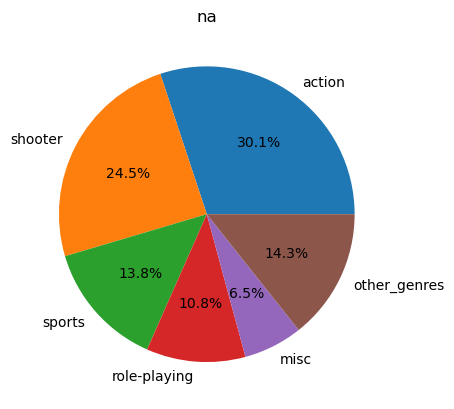

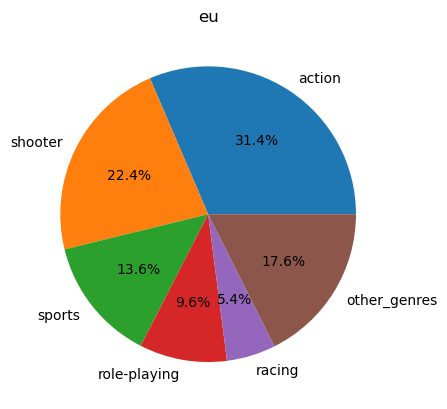

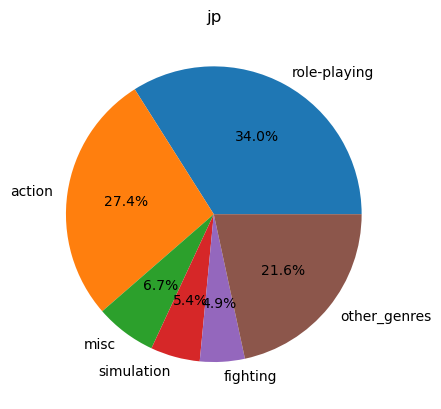

In [37]:
top_region_genres('na_sales')
top_region_genres('eu_sales')
top_region_genres('jp_sales')
plt.show()

В Северной Америке и Европе популярные жанры почти одинаковые, за исключением жанра на 5 месте, в Америке это misc, в Европе racing. Общие жанры action, shooter, sports, role-playing по убыванию количества проданных копий.  
В Японии же на первом месте жанр role-play, далее action, misc, simulation, fighting.  
Такая разница может быть связана с платформой игры, так как в Японии преобладают другие платформы, по сравнению с Америкой и Европой.

In [38]:
# Функия группирует продажи в конкретном регионе по возрастным категориям, а затем строит круговую диаграмму,
# на которой в процентном соотношении приведено распределение этих продаж по категориям.
def sales_rating_dependence(reg):
    return(
        actual_data.pivot_table(index='rating', values=reg, aggfunc='sum')
        .sort_values(by=reg, ascending=False)
        .plot(kind='pie',y=reg, autopct='%1.1f%%', legend=False, title=reg[:2], ylabel='')
    )

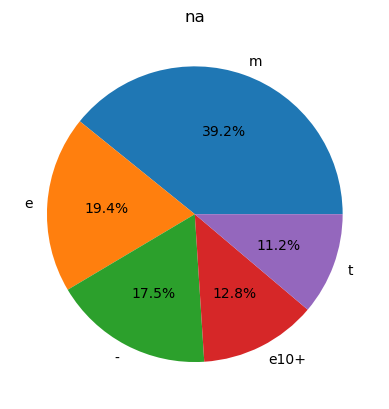

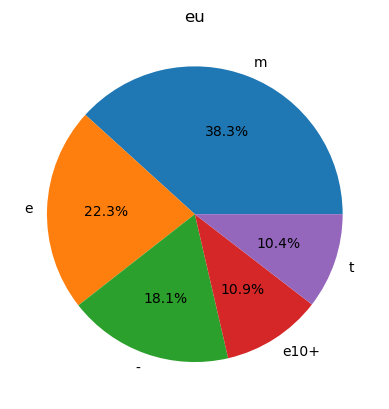

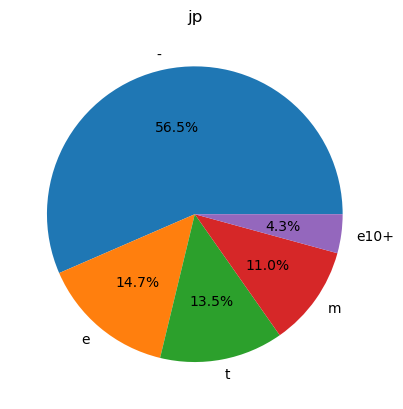

In [39]:
sales_rating_dependence('na_sales')
sales_rating_dependence('eu_sales')
sales_rating_dependence('jp_sales')
plt.show()

В Европе и Северной Америке возрастные категории распределены примерно одинаково в процентном соотношение. Самое большое отличие составляет категория e (everyone) 2.9%.  
В Японии у 56.5% игр нет рейтинга ESRB, 13.5% игр для тинейджеров, 14.7% для всех возрастов, 11% для лиц от 17 лет и старше и 4.3% для всех от 10 лет.  
**Вывод:** в Америке и Европе чаще всего покупают игры с возрастной категорией для лиц от 17 лет и старше, для всех. В Японии чаще всего покупают игры без рейтинга ESRB.

## Проверка гипотез.  
Проверим гипотезу о равенстве средних пользовательских рейтингов платформ xone и pc.  
```
H0: X(xone) = X(pc);  
H1: X(xone) ≠ X(pc).
```

In [40]:
# Берём выборки оценок пользователей по исследуемым платформам.
xone_sample = actual_data.query('platform == "xone" and user_score != -1')['user_score']
pc_sample = actual_data.query('platform == "pc" and user_score != -1')['user_score']

# Уровень значимости возьмём 5%.
alpha = .05
results = st.ttest_ind(xone_sample,
                       pc_sample,
                       equal_var=True)
print('p-значение = ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение =  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, а значит на уровне значимости 0.05 можно предположить, что средние оценки пользователей по платформам xone и pc равны.  

Далее проверим гипотезу о равенстве средних пользовательских рейтингов жанров action и sports
```
H0: X(action) = X(sports);  
H1: X(action) ≠ X(sports).
```

In [41]:
# Берём выборки оценок пользователей по исследуемым жанрам.
action_sample = actual_data.query('genre == "action" and user_score != -1')['user_score']
sports_sample = actual_data.query('genre == "sports" and user_score != -1')['user_score']

# Уровень значимости возьмём 5%.
results = st.ttest_ind(action_sample,
                       sports_sample,
                       equal_var=True)
print('p-значение = ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение =  4.804523380462917e-26
Отвергаем нулевую гипотезу


На уровне значимости 0.05 есть основания отвергнуть нулевую гипотезу, средние значения оценок пользователей по жанрам action и sports не равны.  

При проверке гипотез использовался тест для независимых выборок, так как происходит сравнивание средних оценок пользователей по разным платформам или жанрам.

## Общий вывод.  
**Изучение исходных данных.**  
Исходный датасет состоит из 16715, каждая из которых включает информацию о названии игры, годе выхода, жанре, платформе и прочих описаниях.  

**Предобработка данных.**  
1. Названия столбцов приведены в нижний регистр.  
2. Обработка пропусков.  
Пропуски в названиях и жанрах игр оказались в одинаковых строках, было принято решение удалить их.  
Пропуски в  столбцах с годом релиза, оценками критиков и пользователей были заменены на число -1, так как тип данных столбцов численный. Также в столбце `user_score` абревиатура tbd (to be determined) была заменена на значение -1.  
Пропуски в столбце с возрастной категорией были заполнены знаком -, так как тип данных столбца строковый.
3. Изменение типов данных.
Изменены типы данных столбцов `year_of_release` и `critic_score` на целочисленный integer, так как все данные в столбцах представлены целыми числами. Тип данных столбца `user_score` изменён на вещественный float, так как все значения столбца представлены в виде числа с десятичной дробью.
4. Обработка дубликатов.  
Значения столбцов `name`, `platform`, `genre`, `rating` приведены к нижнему регистру.  
В столбце с возрастной категорией замечены значения 'e' и 'k-a', которые обозначают одинаковую категорию "для всех". Все значения 'k-a' изменены на 'e'.  
Выявлена и удалена одна дублирующаяся игра. В одной из строк не было информации о продажах, поэтому она была удалена.  
5. Создан столбец `total_sales` в котором приведена сумма продаж игр по всем регионам.  

**Исследовательский анализ данных.**  
Построена гистограмма количества выпущенных игр по годам. Пик релизов был в 2008-2009 годах.  
Построено распределение продаж среди топовых платформ по годам за весь период в датасете. Выявлено, что новые платформы заменяют старые, поэтому по общему количеству продаж за все года новые платформы ещё могут быть не в топе по сравнению с предыдущими платформами, которые сейчас уже не пользуются спросом, следовательно для составления прогноза на 2017 год были взяты данные за последние 5 лет.  
Построено распределение продаж среди топовых платформ по годам за актуальный период.  
Построены диаграммы размаха по платформам актуального периода. На основании гистограмм распределения продаж по годам и диаграмм размаха выделились лидирующие платформы: ps4, xone.  
По диаграммам рассеяния количества продаж от оценок критиков выявлена слабая положительная зависимость, зависимость между продажами и оценками пользователей очень слабая.  
По количеству выпущенных игр лидируют жанры: action, role-play, adventure. По количеству продаж: action, shooter, role-play.  
Построив диаграммы размаха по жанрам за актуальный период удалось определить устойчивые к спросу жанры: shooter, sports.  

**Портрет пользователя каждого региона.**  
В Америке и Европе чаще покупают игры на платформах: x360, ps4, ps3, xone, 3ds. В Японии: 3ds, ps3, psv, ps4, wii.  
В Америке и Европе популярные жанры: action, shooter, sports, role-play. Пятый жанр в Америке misc, в Европе racing. В Японии топ жанров: role-play, action, misc, simulation, fighting.  
В Америке и Европе популярнее игры с возрастной категорией для лиц от 17 лет и старше, а также для всех. В Японии чаще всего покупают игры, не имеющие рейтинг ESRB.  

**Проверка гипотез.**  
При проверке гипотез уровень значимости был выбран 0.05.  
Первая гипотеза проверялась на двух выборках оценок пользователей по платформам xone и pc. Нулевую гипотезу отвергнуть не получилось, следовательно на данном уровне значимости предположим, что средние оценки пользователей по платформам xone и pc равны.  
Вторая гипотеза проверялась на двух выборках оценок пользователей по жанрам action и sports. На данном уровне значимости нулевую гипотезу отвергаем, есть основания полагать, что средние значения оценок пользователей по жанрам action и sports не равны.  
Так как сравнивались средние оценки пользователей по разным платформам и жанрам, использовался метод тестирования независимых выборок.  

**Заключение**  
Потенциально перспективные платформы: ps4, xone.  
Есть положительная слабая связь между оценкой критиков и продажами игры.  
Лидирующие жанры: shooter, sports.  
Игры на ps4 чаще покупают в Европе, а игры на xone в Америке.  
В Америке и Европе популярные игры с возрастной категорией для лиц от 17 лет и для всех.  
На основании этой информации можно планировать рекламные кампании.